### Carolyn Zhou

In [174]:
import pandas as pd
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# 1.) Import Data from FRED

In [125]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [126]:
data.index = pd.to_datetime(data.index)

In [127]:
data.dropna(inplace = True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [160]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [161]:
X_in = data_in.iloc[:, 1:]
y_in = data_in.iloc[:, 0]
X_out = data_out.iloc[:, 1:]
y_out = data_out.iloc[:, 0]
X_hold = data_hold.iloc[:, 1:]
y_hold = data_hold.iloc[:,0]

In [162]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [163]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [164]:
import matplotlib.pyplot as plt

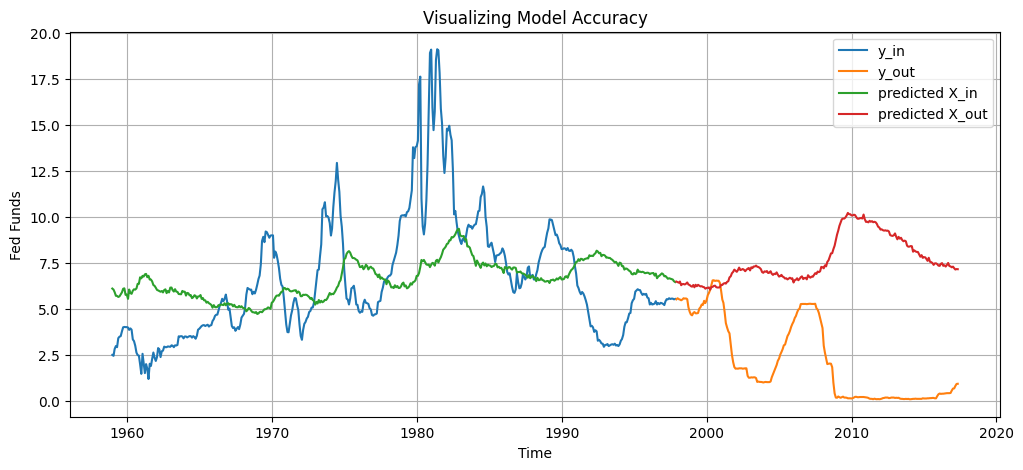

In [177]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["y_in", "y_out", "predicted: X_in", "predicted: X_out"])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [170]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
degrees = 2
max_degrees = 3

DEGREES:  1


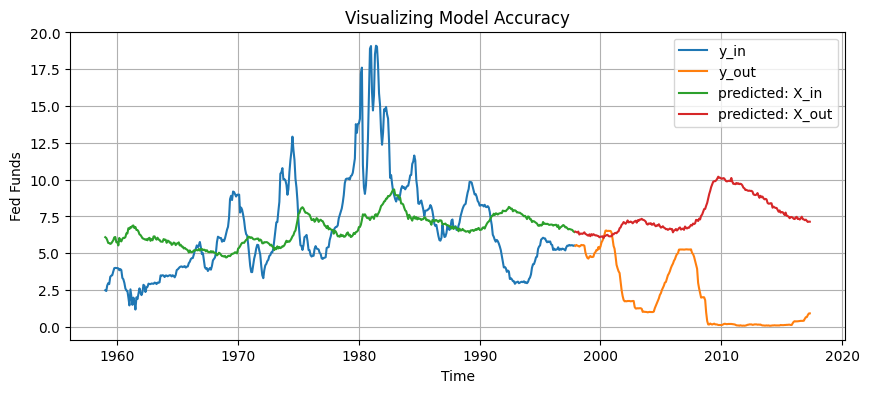

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566789
DEGREES:  2


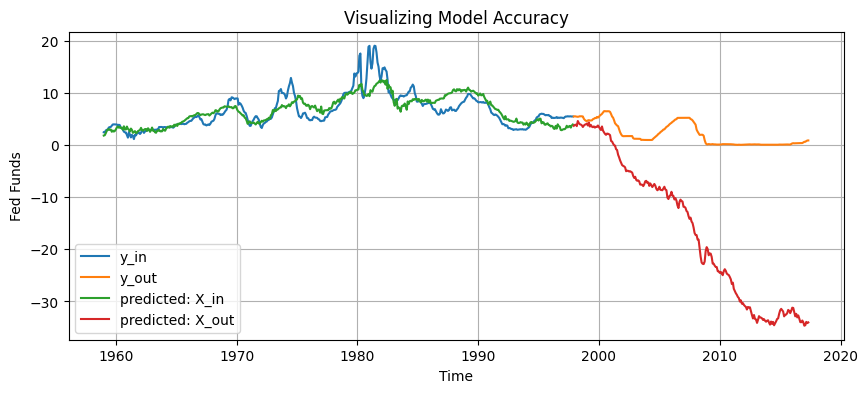

Insample MSE :  3.8634771392760694
Outsample MSE :  481.4465099288575
DEGREES:  3


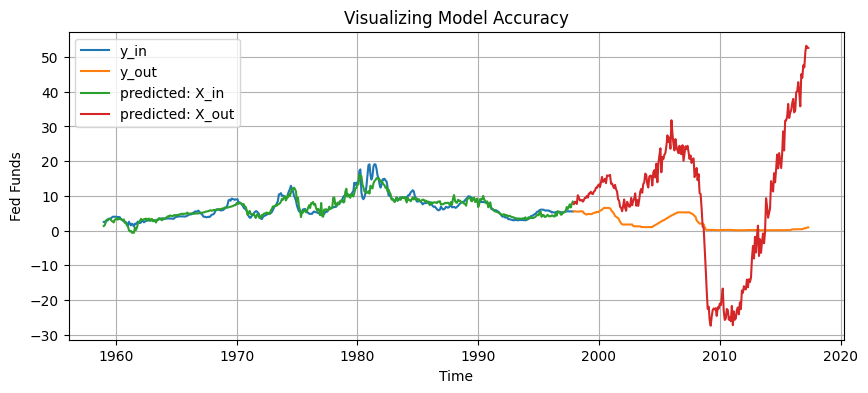

Insample MSE :  1.8723636267299308
Outsample MSE :  371.76787118814127


In [183]:
for degrees in range(1, max_degrees + 1):
    print("DEGREES: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    #Q3
    model_poly = sm.OLS(y_in, X_in_poly).fit()
    
    #Q4
    plt.figure(figsize = (10,4))
    
    in_preds = model_poly.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model_poly.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["y_in", "y_out", "predicted: X_in", "predicted: X_out"])
    plt.grid()
    plt.show()
    
    #Q5
    in_mse_poly = mean_squared_error(y_in, model_poly.predict(X_in_poly))
    out_mse_poly = mean_squared_error(y_out, model_poly.predict(X_out_poly))
    
    print("Insample MSE : ", in_mse_poly)
    print("Outsample MSE : ", out_mse_poly)


# 7.) State your observations :

_We can observe from these graphs that as our number of degrees increases, our insample MSE decreases and our outsample MSE increases. For degrees = 1, our model performs mediocrely. For degrees = 2, our model performs better and our insample MSE has improved, but our outsample MSE increases greatly. For degrees = 3, this problem is exacerbated even further. This just shows that as our number of degrees goes up, our model improves before starting to overfit at a certain point._ 
